This notebook creates all the figures in the manuscript.
In order to run it, it will be necessary to already have run the script 'simulations.py' for all the parameter sets and have their csv products in the same folder

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from rev_lib import *

Initiate parameters

In [2]:
def get_confidence(y):
    y = np.array(y)
    yt = y.transpose()
    
    mean= np.mean(y,axis=0) 
    under95 = [np.percentile(d,2.5) for d in yt]
    under50 = [np.percentile(d,25) for d in yt]
    median  = [np.percentile(d,50) for d in yt]
    upper50 = [np.percentile(d,75) for d in yt]
    upper95 = [np.percentile(d,97.5) for d in yt]
    return mean,under95,under50,median,upper50,upper95
    

def plot_confidence(ax,mean,under95,under50,median,upper50,upper95,label=True,color='b'):
    x = np.arange(mean.size)
    if label:
        ax.plot(mean,color='r',label='Mean')
        ax.plot(median,color='k',label='Median')
        ax.fill_between(x,under95,under50,color=color,alpha=.25, label = '95% Credible interval')
        ax.fill_between(x,under50,upper50,color=color,alpha=.5,label = '50% Credible interval')
        ax.fill_between(x,upper50,upper95,color=color,alpha=.25)
    else:
        ax.plot(mean,color='r')
        ax.plot(median,color='k')
        ax.fill_between(x,under95,under50,color=color,alpha=.25)
        ax.fill_between(x,under50,upper50,color=color,alpha=.5)
        ax.fill_between(x,upper50,upper95,color=color,alpha=.25)

**SI - A**

In [3]:
pas = [params(10,5,3,'c'),
       params(10,5,4,'c'),
       params(10,5,5,'c')]

#pas = [params(10,5,3,'q'),
#       params(10,5,4,'q'),
#       params(10,5,5,'q')]

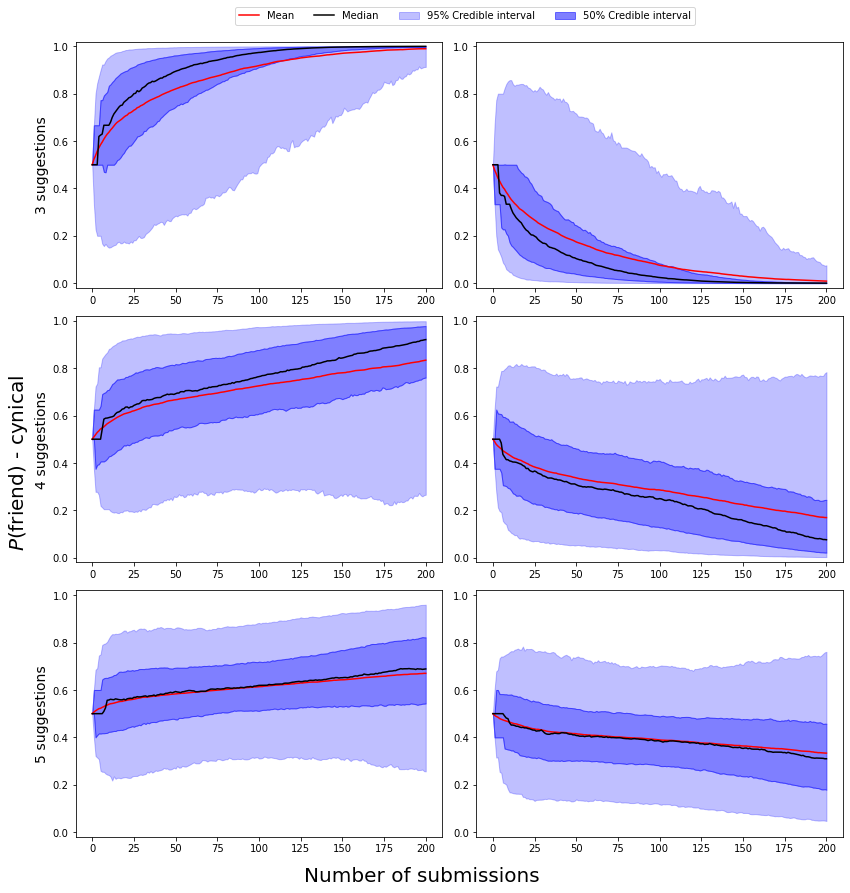

In [4]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

label_mark = True
for (axi,gl) in zip(ax,pas):
    rho_cf = pd.read_csv('rho_friend_{}.csv'.format(gl.suffix))
    plot_confidence(axi[0],*get_confidence(rho_cf),label=label_mark)
    axi[0].set_ylim([-.02,1.02])
    
    label_mark=False

    rho_cr = pd.read_csv('rho_rival_{}.csv'.format(gl.suffix))
    plot_confidence(axi[1],*get_confidence(rho_cr),label=label_mark)
    axi[1].set_ylim([-.02,1.02])
    
    axi[0].set_ylabel(r'{} suggestions'.format(gl.N_suggested),size=14)
    
fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'$P($friend$)$ - {}'.format(gl.model_name),size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('rho_different_suggestions_{}.png'.format(gl.model_name),dpi=300,bbox_inches="tight")

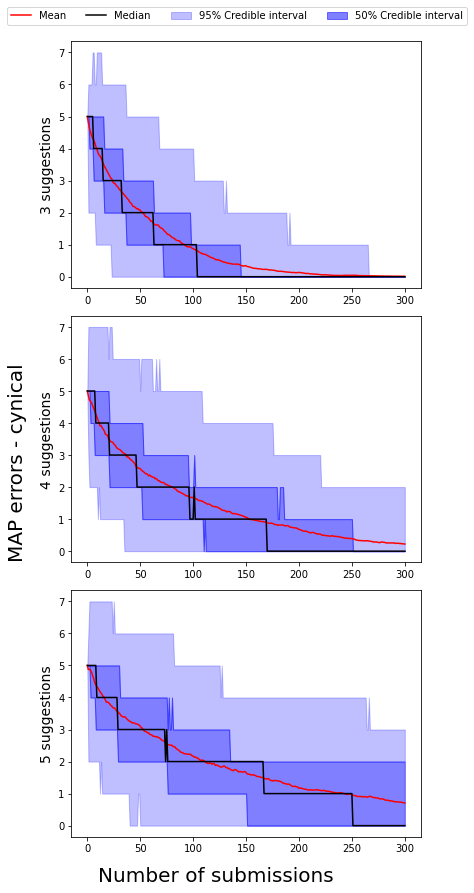

In [5]:
fig,ax=plt.subplots(3,1,figsize=(6,12))

label_mark = True
for (axi,gl) in zip(ax,pas):
    map_s = pd.read_csv('map_{}.csv'.format(gl.suffix))
    plot_confidence(axi,*get_confidence(map_s),label=label_mark)
    #axi.set_ylim([-.02,1.02])
    
    label_mark=False
    axi.set_ylabel(r'{} suggestions'.format(gl.N_suggested),size=14)

fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'MAP errors - {}'.format(gl.model_name),size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('map_different_suggestions_{}.png'.format(gl.model_name),dpi=300,bbox_inches="tight")

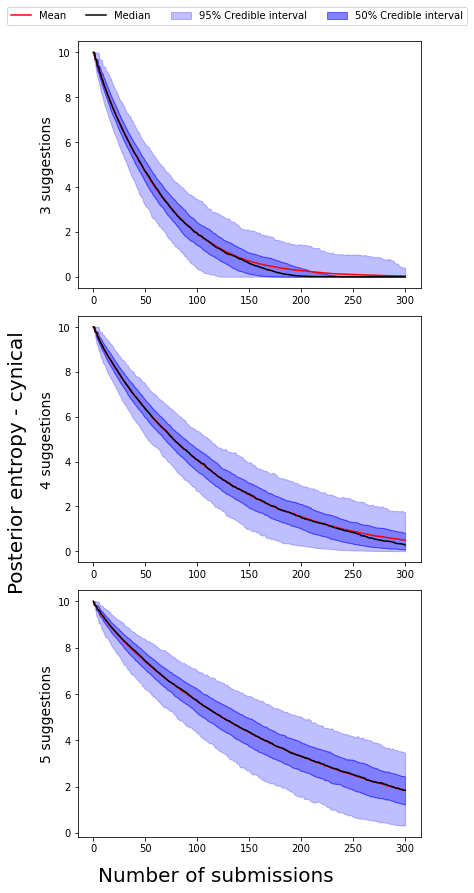

In [6]:
fig,ax=plt.subplots(3,1,figsize=(6,12))

label_mark = True
for (axi,gl) in zip(ax,pas):
    map_s = pd.read_csv('entropy_{}.csv'.format(gl.suffix))
    plot_confidence(axi,*get_confidence(map_s),label=label_mark)
    #axi.set_ylim([-.02,1.02])
    
    label_mark=False
    axi.set_ylabel(r'{} suggestions'.format(gl.N_suggested),size=14)
    
fig.legend(loc=8,ncol=4,bbox_to_anchor=(.55,1.001))
fig.supylabel(r'Posterior entropy - {}'.format(gl.model_name),size=20)
fig.supxlabel('Number of submissions'.format(gl.model_name),size=20)

fig.patch.set_facecolor('white')
fig.tight_layout()
plt.savefig('entropy_different_suggestions_{}.png'.format(gl.model_name),dpi=300,bbox_inches="tight")